<a href="https://colab.research.google.com/github/EDMMaster/Project3G1/blob/LaQuita/main_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Terry

In [1]:
# Create directories for each dataset
!mkdir -p ./saurabh_fake_news_classification
!mkdir -p ./aadyasingh_fake_news_classification

# Download and unzip the first dataset into the specified folder
!kaggle datasets download -d saurabhshahane/fake-news-classification -p ./saurabh_fake_news_classification --unzip

# Download and unzip the second dataset into its specified folder
!kaggle datasets download -d aadyasingh55/fake-news-classification -p ./aadyasingh_fake_news_classification --unzip

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification
License(s): Attribution 4.0 International (CC BY 4.0)
100% 92.0M/92.1M [00:01<00:00, 79.7MB/s]
100% 92.1M/92.1M [00:01<00:00, 90.7MB/s]
Dataset URL: https://www.kaggle.com/datasets/aadyasingh55/fake-news-classification
License(s): apache-2.0
 80% 31.0M/39.0M [00:00<00:00, 164MB/s]
100% 39.0M/39.0M [00:00<00:00, 136MB/s]


In [2]:
import pandas as pd

In [3]:
# Load the datasets
wel_fake_df = pd.read_csv('./saurabh_fake_news_classification/WELFake_Dataset.csv')
train_df = pd.read_csv('./aadyasingh_fake_news_classification/train (2).csv', sep=';')
test_df = pd.read_csv('./aadyasingh_fake_news_classification/test (1).csv', sep=';')
eval_df = pd.read_csv('./aadyasingh_fake_news_classification/evaluation.csv', sep=';')

In [4]:
wel_fake_df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
train_df.head()

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [6]:
# Flip labels in WELFake_Dataset.csv
wel_fake_df['label'] = wel_fake_df['label'].apply(lambda x: 1 if x == 0 else 0)
wel_fake_df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,0
1,1,NaN,Did they post their votes for Hillary already?,0
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",0
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,1
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",0


In [7]:
# Combine all datasets into a single DataFrame
combined_df = pd.concat([wel_fake_df, train_df, test_df, eval_df], ignore_index=True)
combined_df.shape

(112721, 4)

In [8]:
# Count duplicates based on "title" and "text" columns in the combined DataFrame
total_duplicates = combined_df.duplicated(subset=["title", "text"]).sum()
print("Total Duplicates Across All Datasets:", total_duplicates)

Total Duplicates Across All Datasets: 27054


In [9]:
deduplicated_df = combined_df.drop_duplicates(subset=["title", "text"], inplace=False)
deduplicated_df.shape

(85667, 4)

LaQuita

In [10]:
!pip install vaderSentiment

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, accuracy_score

In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
print(deduplicated_df.isnull().sum())

Unnamed: 0      0
title         518
text           39
label           0
dtype: int64


In [13]:
nulls_removed_df = deduplicated_df.dropna().reset_index(drop=True)
cleaned_df = nulls_removed_df.copy()
print(cleaned_df.isnull().sum())

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


In [14]:
cleaned_df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,0
1,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",0
2,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,1
3,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",0
4,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,0


In [15]:
X = cleaned_df.drop(columns=['label'])
y = cleaned_df['label']

In [16]:
X.head()

,Unnamed: 0,title,text
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...
1,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ..."
2,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...
3,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will..."
4,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...


In [17]:
y.head()

,label
0,0
1,0
2,1
3,0
4,0


In [18]:
print(X.shape)
print(y.shape)

(85110, 3)
(85110,)


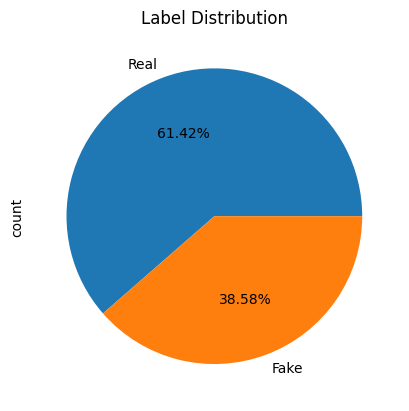

In [19]:
# Mapping 0 to 'Fake' and 1 to 'Real'
label_mapping = {0: 'Fake', 1: 'Real'}

# Plotting the pie chart with custom labels
cleaned_df['label'].value_counts().rename(index=label_mapping).plot.pie(
    autopct='%.2f%%',
    labels=['Real', 'Fake']  # Explicitly set labels
)

plt.title("Label Distribution")
plt.show()

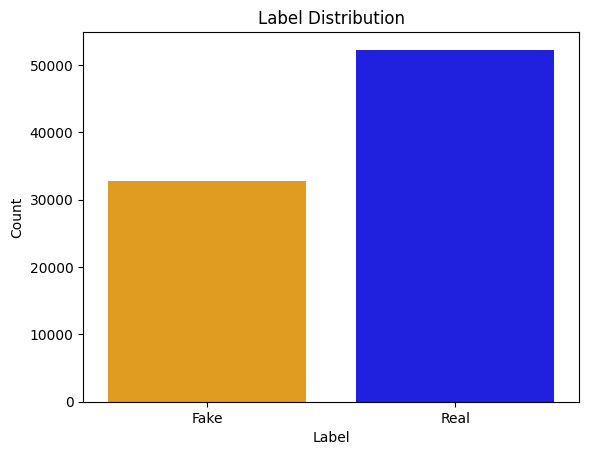

In [20]:
# Count plot for label distribution
sns.countplot(data=cleaned_df, x='label', hue='label', legend=False, palette=['orange', 'blue'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.ylabel('Count')
plt.show()

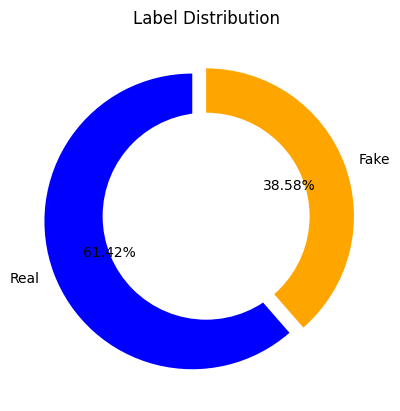

In [21]:
# Donut plot for label distribution
sizes = cleaned_df['label'].value_counts()
colors = ['blue', 'orange']
explode = (0.1, 0)

plt.pie(sizes, labels=['Real', 'Fake'], autopct='%.2f%%', startangle=90, colors=colors, explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Label Distribution')
plt.show()

In [22]:
messages = X.copy()

# Reset the index to avoid errors caused by using dropna() earlier
messages.reset_index(inplace=True)
print(messages['title'][1])

UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]


In [23]:
### Text Preprocessing ###

# Initialize stemmer and sentiment analyzer
ps = PorterStemmer()
analyzer = SentimentIntensityAnalyzer()

# Define stopwords set once to avoid repeated calls in the loop
stop_words = set(stopwords.words('english'))

# Create an empty list for the corpus
corpus = []

# Preprocess each message title
for i in range(0, len(messages)):
    # Remove non-alphabetic characters and convert to lowercase
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()


# Stemming and stopword removal
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = ' '.join(review)
    corpus.append(review)


# Display a sample of the processed corpus
print(corpus[:30])

# Calculate the maximum sentence length for padding
max_length = max(len(sentence.split()) for sentence in corpus)
print("Maximum sentence length:", max_length)

['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video', 'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video', 'bobbi jindal rais hindu use stori christian convers woo evangel potenti bid', 'satan russia unv imag terrifi new supernuk western world take notic', 'time christian group sue amazon splc design hate group', 'dr ben carson target ir never audit spoke nation prayer breakfast', 'hous intel chair trump russia fake stori evid anyth video', 'sport bar owner ban nfl game show true american sport like speak rural america video', 'latest pipelin leak underscor danger dakota access pipelin', 'gop senat smack punchabl alt right nazi internet', 'may brexit offer would hurt cost eu citizen eu parliament', 'schumer call trump appoint offici overse puerto rico relief', 'watch hilari ad call question health age clinton crime famili boss', 'chang expect espn polit agenda despit huge subscrib declin breitbart', 'billionair

In [24]:
# Create an instance of CountVectorizer and fit-transform the corpus
cv = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
dtm = cv.fit_transform(corpus)
print("Document-Term Matrix shape:", dtm.shape)


# Initialize and fit the LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(dtm)


# Display the top 15 words for each topic for analysis
for index, topic in enumerate(lda.components_):
    print(f'The Top 15 Words For Topic #{index + 1}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')


# Transform the DTM into topic results
topic_results = lda.transform(dtm)

# Define topic labels and map them to the most probable topic for each document
topic_labels = {
    1: 'Entertainment',
    2: 'Sports',
    3: 'Business',
    4: 'Politics',
    5: 'Technology'

}

# Function to add topic labels to the DataFrame
def add_topic_labels(cleaned_df, topic_results, topic_labels):
    cleaned_df['topic'] = topic_results.argmax(axis=1) + 1
    cleaned_df['topic_label'] = cleaned_df['topic'].map(topic_labels)

# Apply the function to add topic labels
add_topic_labels(cleaned_df, topic_results, topic_labels)

# Display a preview of the labeled DataFrame
print(cleaned_df.head(20))

Document-Term Matrix shape: (85110, 8230)
The Top 15 Words For Topic #1
['win', 'support', 'presidenti', 'video', 'presid', 'voter', 'vote', 'parti', 'sander', 'republican', 'poll', 'democrat', 'hillari', 'clinton', 'trump']


The Top 15 Words For Topic #2
['support', 'make', 'breitbart', 'twitter', 'america', 'elect', 'presid', 'hillari', 'tweet', 'news', 'donald', 'obama', 'watch', 'video', 'trump']


The Top 15 Words For Topic #3
['ryan', 'budget', 'cut', 'congress', 'democrat', 'say', 'breitbart', 'obamacar', 'fund', 'hous', 'plan', 'tax', 'republican', 'senat', 'trump']


The Top 15 Words For Topic #4
['dead', 'citi', 'right', 'state', 'clinton', 'presid', 'vote', 'al', 'talk', 'law', 'britain', 'say', 'uk', 'eu', 'brexit']


The Top 15 Words For Topic #5
['world', 'air', 'isi', 'strike', 'iraq', 'syrian', 'forc', 'turkey', 'islam', 'attack', 'war', 'kill', 'state', 'say', 'syria']


The Top 15 Words For Topic #6
['life', 'race', 'game', 'year', 'review', 'world', 'travel', 'ban',

In [25]:
# Sentiment Analysis using VADER
# Calculate sentiment scores for each title in the corpus
sentiments = [analyzer.polarity_scores(title)['compound'] for title in corpus]

# Reshape sentiment scores for concatenation
X_sentiment = np.array(sentiments).reshape(-1, 1)

# Display a sample of sentiment scores
print("Sample sentiment scores:")
print(X_sentiment[:5])

Sample sentiment scores:
[[-0.7845]
 [-0.25  ]
 [ 0.4767]
 [ 0.    ]
 [-0.4588]]


In [26]:
# One-hot encode the corpus and add padding to standardize input lengths
# Convert the corpus to one-hot representations with a defined vocabulary size
vocab_size = 10000  # Define vocabulary size for one-hot encoding
onehot_repr = [one_hot(words, vocab_size) for words in corpus]

# Pad sequences to ensure uniform input size
sentence_length = 50
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sentence_length)

# Print a preview of the padded documents
print("Sample of embedded documents:")
print(embedded_docs[:5])

# Concatenate topic results and sentiment scores into the final input array
# Combine topic results and sentiment scores with the embedded documents
X_final_with_topics = np.concatenate((embedded_docs, topic_results), axis=1)
X_final_with_sentiment = np.concatenate((X_final_with_topics, X_sentiment), axis=1)

# Convert to NumPy arrays for training
X_final = np.array(X_final_with_sentiment)
y_final = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)
print("Train-test split completed.")

Sample of embedded documents:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0 4141 6480 1540 7806
  6896 1552 7895 3111 9593 2302 1002 9368]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0 9097  874 3429 4257 6683 4766
  8863  788 2212 5567 2283 6178 1013 9368]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0 4463 1399 6279 9158
  7786 7714 2827 1250 1849 4269 5346 2991]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0   

In [27]:
# Define and train LSTM models
vocab_size = 10000
embedding_vector_features = 125
input_length = X_train.shape[1]

# First Model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_features))#input_length=input_length

model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

# Evaluate First Model
y_log = model.predict(X_test)
y_pred = np.where(y_log > 0.5, 1, 0)

acc = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

model.save('model.keras')

print(acc)
print(confusion_mat)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
2128/2128 ━━━━━━━━━━━━━━━━━━━━ 107s 49ms/step - accuracy: 0.8303 - loss: 0.3561 - val_accuracy: 0.9039 - val_loss: 0.2345
Epoch 2/5
2128/2128 ━━━━━━━━━━━━━━━━━━━━ 144s 50ms/step - accuracy: 0.9264 - loss: 0.1860 - val_accuracy: 0.9125 - val_loss: 0.2179
Epoch 3/5
2128/2128 ━━━━━━━━━━━━━━━━━━━━ 106s 50ms/step - accuracy: 0.9444 - loss: 0.1388 - val_accuracy: 0.9132 - val_loss: 0.2216
Epoch 4/5
2128/2128 ━━━━━━━━━━━━━━━━━━━━ 140s 49ms/step - accuracy: 0.9557 - loss: 0.1118 - val_accuracy: 0.9152 - val_loss: 0.2552
Epoch 5/5
2128/2128 ━━━━━━━━━━━━━━━━━━━━ 146s 51ms/step - accuracy: 0.9664 - loss: 0.0838 - val_accuracy: 0.9069 - val_loss: 0.3153
532/532 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
0.9068852073786864
[[5510 1074]
 [ 511 9927]]


In [28]:
# Ensure X_train and vocab_size are defined correctly
vocab_size = 10000
embedding_vector_features = 125
input_length = X_train.shape[1]

# Try to build the model
try:
    print("Building model...")
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_features))
    print("Added Embedding layer.")
    model.add(LSTM(50))
    print("Added LSTM layer.")
    model.add(Dense(1, activation='sigmoid'))
    print("Added Dense layer.")
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("Compiled the model.")

    # Create dummy data with the appropriate input shape
    dummy_data = np.zeros((1, input_length))

    # Perform a forward pass to build the model layers
    model.predict(dummy_data)

    # Print the model summary after the layers have been built
    print(model.summary())
except Exception as e:
    print(f"Error in building the model: {e}")

# Try to train the model
try:
    print("Starting training...")
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)
    print("Training completed.")
except Exception as e:
    print(f"Error in training the model: {e}")

# Try to make predictions and evaluate the model
try:
    print("Predicting...")
    y_log = model.predict(X_test)
    y_pred = np.where(y_log > 0.5, 1, 0)
    print("Predictions done.")

    print("Calculating accuracy...")
    acc = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_mat)
except Exception as e:
    print(f"Error in prediction or evaluation: {e}")

# Try to save the model
try:
    print("Saving model...")
    model.save('model_1.keras')
    print("Model saved.")
except Exception as e:
    print(f"Error in saving the model: {e}")


Building model...
Added Embedding layer.
Added LSTM layer.
Added Dense layer.
Compiled the model.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (1, 61, 125)                │       1,250,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (1, 50)                     │          35,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (1, 1)                      │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,285,251 (4.90 MB)

 Trainable params: 1,285,251 (4.90 MB)

 Non-trainable params: 0 (0.00 B)

None
Starting training...
Epoch 1/5
2128/2128 ━━━━━━━━━━━━━━━━━━━━ 106s 48ms/step - accuracy: 0.8334 - loss: 0.3483 - val_accuracy: 0.9044 - val_loss: 0.2358
Epoch 2/5
2128/2128 ━━━━━━━━━━━━━━━━━━━━ 104s 49ms/step - accuracy: 0.9278 - loss: 0.1866 - val_accuracy: 0.9151 - val_loss: 0.2146
Epoch 3/5
2128/2128 ━━━━━━━━━━━━━━━━━━━━ 142s 49ms/step - accuracy: 0.9447 - loss: 0.1405 - val_accuracy: 0.9159 - val_loss: 0.2182
Epoch 4/5
2128/2128 ━━━━━━━━━━━━━━━━━━━━ 142s 49ms/step - accuracy: 0.9587 - loss: 0.1062 - val_accuracy: 0.9144 - val_loss: 0.2370
Epoch 5/5
2128/2128 ━━━━━━━━━━━━━━━━━━━━ 105s 49ms/step - accuracy: 0.9657 - loss: 0.0859 - val_accuracy: 0.9150 - val_loss: 0.2644
Training completed.
Predicting...
532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step
Predictions done.
Calculating accuracy...
Accuracy: 0.91499236282458
Confusion Matrix:
 [[5775  809]
 [ 638 9800]]
Saving model...
Model saved.


In [ ]:
# Second Model with Multiple LSTM Layers


vocab_size = 10000
embedding_vector_features = 150
input_length = X_train.shape[1]


model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_features))#input_length=input_length
model1.add(LSTM(100, return_sequences=True))
model1.add(LSTM(50, return_sequences=True))
model1.add(LSTM(20))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

# Evaluate Second Model
y_log_1 = model1.predict(X_test)
y_pred_1 = np.where(y_log_1 > 0.5, 1, 0)

acc_1 = accuracy_score(y_test, y_pred_1)
confusion_mat_1 = confusion_matrix(y_test, y_pred_1)

model.save('model1.keras')

print(acc_1)
print(confusion_mat_1)

In [ ]:
# Ensure X_train and vocab_size are defined correctly
vocab_size = 10000
embedding_vector_features = 150
input_length = X_train.shape[1]

# Try to build the model
try:
    print("Building model...")
    model1 = Sequential()
    model1.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_features))
    print("Added Embedding layer.")
    model1.add(LSTM(100, return_sequences=True))
    print("Added LSTM layer.")
    model1.add(LSTM(50, return_sequences=True))
    print("Added LSTM layer.")
    model1.add(LSTM(20))
    print("Added LSTM layer.")
    model.add(Dense(1, activation='sigmoid'))
    print("Added Dense layer.")
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("Compiled the model.")

    # Create dummy data with the appropriate input shape
    dummy_data = np.zeros((1, input_length))

    # Perform a forward pass to build the model layers
    model1.predict(dummy_data)

    # Print the model summary after the layers have been built
    print(model1.summary())
except Exception as e:
    print(f"Error in building the model: {e}")

# Try to train the model
try:
    print("Starting training...")
    history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)
    print("Training completed.")
except Exception as e:
    print(f"Error in training the model: {e}")

# Try to make predictions and evaluate the model
try:
    print("Predicting...")
    y_log = model1.predict(X_test)
    y_pred = np.where(y_log > 0.5, 1, 0)
    print("Predictions done.")

    print("Calculating accuracy...")
    acc_1 = accuracy_score(y_test, y_pred)
    confusion_mat_1 = confusion_matrix(y_test, y_pred)
    print("Accuracy:", acc_1)
    print("Confusion Matrix:\n", confusion_mat_1)
except Exception as e:
    print(f"Error in prediction or evaluation: {e}")

# Try to save the model
try:
    print("Saving model...")
    model1.save('model_1.keras')
    print("Model saved.")
except Exception as e:
    print(f"Error in saving the model: {e}")

In [ ]:
# Third Model with Bidirectional LSTM
vocab_size = 10000
embedding_vector_features = 150
input_length = X_train.shape[1]

model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_features))#input_length=input_length
model2.add(LSTM(100, return_sequences=True))
model2.add(Bidirectional(LSTM(200, return_sequences=True)))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=100)

# Evaluate Third Model
y_log_2 = model2.predict(X_test)
y_pred_2 = np.where(y_log_2 > 0.5, 1, 0)
acc_2 = accuracy_score(y_test, y_pred_2)
confusion_mat_2 = confusion_matrix(y_test, y_pred_2)

model2.save('model2.keras')

print(acc_2)
print(confusion_mat_2)

In [ ]:
# Ensure X_train and vocab_size are defined correctly
vocab_size = 10000
embedding_vector_features = 150
input_length = X_train.shape[1]

# Try to build the model
try:
    print("Building model...")
    model2 = Sequential()
    model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_features))#input_length=input_length
    print("Added Embedding layer.")
    model2.add(LSTM(100, return_sequences=True))
    print("Added LSTM layer.")
    model2.add(Bidirectional(LSTM(200, return_sequences=True)))
    print("Added Bidirectional LSTM layer.")
    model2.add(Dense(1, activation='sigmoid'))
    print("Added Dense layer.")
    model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("Compiled the model.")

    # Create dummy data with the appropriate input shape
    dummy_data = np.zeros((1, input_length))

    # Perform a forward pass to build the model layers
    model2.predict(dummy_data)

    # Print the model summary after the layers have been built
    print(model2.summary())
except Exception as e:
    print(f"Error in building the model: {e}")

# Try to train the model
try:
    print("Starting training...")
    history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=100)
    print("Training completed.")
except Exception as e:
    print(f"Error in training the model: {e}")

# Try to make predictions and evaluate the model
try:
    print("Predicting...")
    y_log_2 = model2.predict(X_test)
    y_pred_2 = np.where(y_log_2 > 0.5, 1, 0)
    print("Predictions done.")

    print("Calculating accuracy...")
    acc_2 = accuracy_score(y_test, y_pred_2)
    confusion_mat_2 = confusion_matrix(y_test, y_pred_2)
    print("Accuracy:", acc_2)
    print("Confusion Matrix:\n", confusion_mat_2)
except Exception as e:
    print(f"Error in prediction or evaluation: {e}")

# Try to save the model
try:
    print("Saving model...")
    model2.save('model2.keras')
    print("Model saved.")
except Exception as e:
    print(f"Error in saving the model: {e}")


Elijah

In [ ]:
# Install Gradio
!pip install gradio

# Import necessary libraries
import gradio as gr
from tensorflow.keras.models import load_model
import pickle

In [ ]:
# Load the trained LSTM model
model = load_model("model.keras")  # Replace with your model path
model = load_model("model1.keras")
model = load_model("model2.keras")

# model_paths = ["model.keras", "model1.keras", "model2.keras"]
# models = [load_model(path) for path in model_paths]


# # Save tokenizer
# with open("tokenizer.pkl", "wb") as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load the tokenizer
with open("tokenizer.pkl", "rb") as handle:
    tokenizer = pickle.load(handle)


# Predefined sequence length
MAX_SEQUENCE_LENGTH = max_length  # Update as per the model training

In [ ]:
def classify_text(news_text):
    """
    Preprocess the text input, predict using the LSTM model, and return the classification.
    """
    # Preprocess the input text
    sequence = tokenizer.texts_to_sequences([news_text])
    padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)

    # Predict
    prediction = model.predict(padded_sequence)[0][0]

    # Interpret the result
    result = "Fake News" if prediction >= 0.5 else "Real News"
    confidence = prediction if prediction >= 0.5 else 1 - prediction
    return f"{result} (Confidence: {confidence:.2%})"

In [ ]:
# Gradio interface
iface = gr.Interface(
    fn=classify_text,
    inputs=gr.Textbox(lines=5, placeholder="Enter text here...", label="Enter News Text"),
    outputs=gr.Textbox(label="Prediction"),
    title="Fake News Detector",
    description="This tool uses an LSTM model to classify whether a piece of text is fake or real news."
)

# Launch the app
iface.launch(share=True)

Questions/Comparisons:
1. Headline vs. Content Matching/Source credibility
2. Which keywords or phrases are most commonly found in fake news?
3. What topics are targeted by fake news most?
4. Frequency and Time posted